In [2]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "sd-legacy/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horse.png")


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

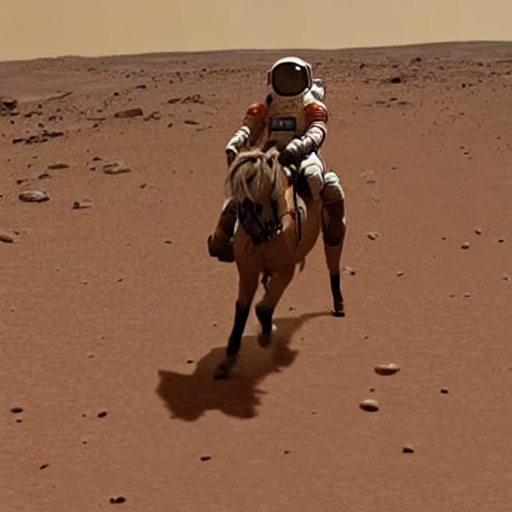

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
img = cv.imread('astronaut_rides_horse.png')
cv2_imshow(img)

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
import cv2 as cv
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16)

prompt = input("enter the prompt")

image = pipe(prompt).images[0]

# you can save the image with
image.save(f"astronaut_rides_horse.png")

img = cv.imread(image)
cv2_imshow(img)



### Using the

In [1]:
import cv2
import numpy as np
from collections import Counter

# Step 1: Load the image
image = cv2.imread("your_image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Step 2: Reshape the image to a 2D array of pixels
pixels = image.reshape(-1, 3)  # Reshape to a list of RGB values

# Step 3: Convert pixels to a list of tuples
pixel_tuples = [tuple(pixel) for pixel in pixels]

# Step 4: Count the frequency of each color
color_counts = Counter(pixel_tuples)

# Step 5: Find the two most common colors
most_common_colors = color_counts.most_common(2)

# Step 6: Print the results
for i, (color, count) in enumerate(most_common_colors, start=1):
    print(f"Color {i}: {color}, Count: {count}")


Color 1: (230, 230, 232), Count: 570
Color 2: (217, 217, 219), Count: 343


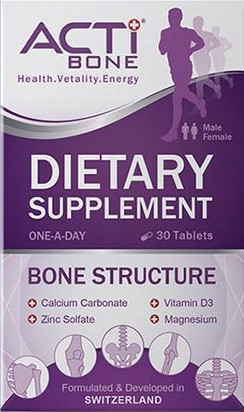

In [4]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('your_image.jpg')
cv2_imshow(img)

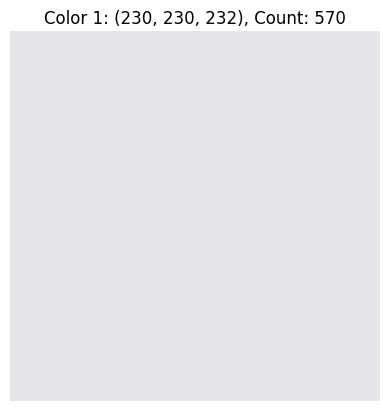

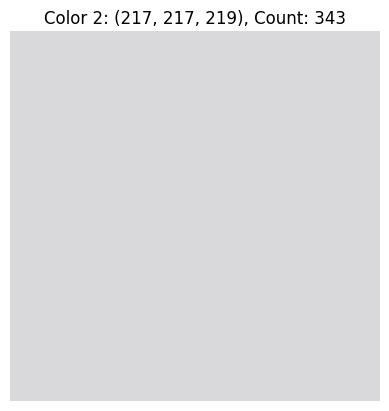

In [2]:
import matplotlib.pyplot as plt

for i, (color, count) in enumerate(most_common_colors, start=1):
    plt.figure()
    plt.imshow([[list(color)]])  # Display a single color
    plt.title(f"Color {i}: {color}, Count: {count}")
    plt.axis("off")
plt.show()

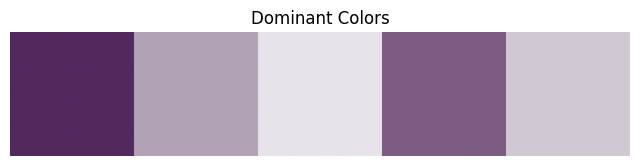

Color 1: RGB (82, 41, 94)
Color 2: RGB (178, 162, 182)
Color 3: RGB (231, 227, 234)
Color 4: RGB (125, 92, 130)
Color 5: RGB (208, 201, 211)


In [5]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread("your_image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

# Step 2: Reshape the image to a 2D array of pixels
pixels = image.reshape(-1, 3)  # Flatten the image into an array of RGB values

# Step 3: Apply K-Means clustering
num_colors = 5  # Number of dominant colors you want
kmeans = KMeans(n_clusters=num_colors, random_state=42)
kmeans.fit(pixels)

# Step 4: Get the dominant colors
dominant_colors = kmeans.cluster_centers_.astype(int)  # RGB values of dominant colors
labels = kmeans.labels_

# Step 5: Visualize the colors
color_blocks = [np.full((100, 100, 3), color, dtype=int) for color in dominant_colors]
palette = np.hstack(color_blocks)

plt.figure(figsize=(8, 2))
plt.imshow(palette / 255)  # Normalize for display
plt.axis("off")
plt.title("Dominant Colors")
plt.show()

# Print RGB values of dominant colors
for i, color in enumerate(dominant_colors):
    print(f"Color {i+1}: RGB {tuple(color)}")


## Gen AI model

In [ ]:
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5")

prompt = f"a photo of a cat holding a sign that says hello world only using colors {dominant_colors[0]},{dominant_colors[1]}"

image = pipe(
    prompt=prompt,
    negative_prompt="",
    num_inference_steps=50,
    height=1200,
    width=1000,
    guidance_scale=7.0,
).images[0]

image.save("sd3_hello_world.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

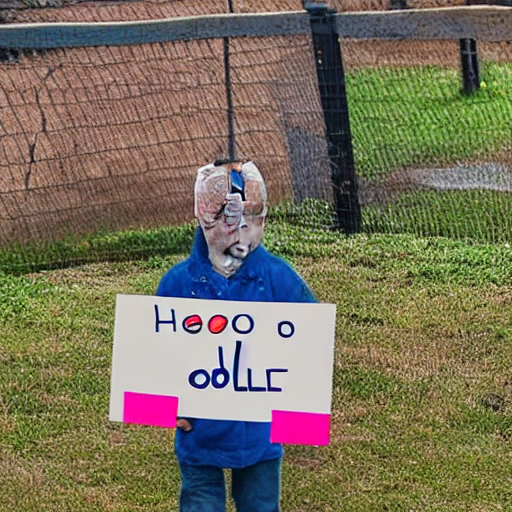

In [8]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('sd3_hello_world.png')
cv2_imshow(img)